In [1]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [2]:
import tensorflow as tf
Hello = tf.constant('hello Tensorflow!')
sess = tf.Session()
print(sess.run(Hello))

b'hello Tensorflow!'


Extracting d:/MNIST_data\train-images-idx3-ubyte.gz
Extracting d:/MNIST_data\train-labels-idx1-ubyte.gz
Extracting d:/MNIST_data\t10k-images-idx3-ubyte.gz
Extracting d:/MNIST_data\t10k-labels-idx1-ubyte.gz
55000
10000
<class 'numpy.ndarray'>
(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)
51001th Training Datalabel is8


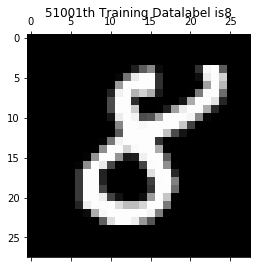

40915th Training Datalabel is4


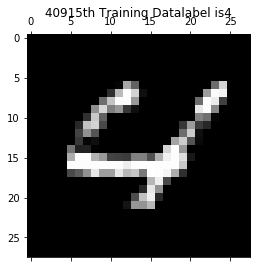

14649th Training Datalabel is0


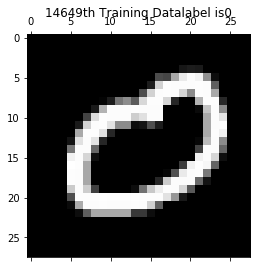

46303th Training Datalabel is0


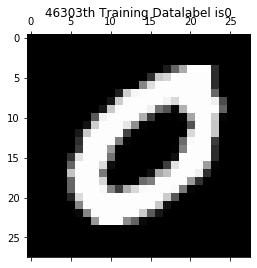

33543th Training Datalabel is0


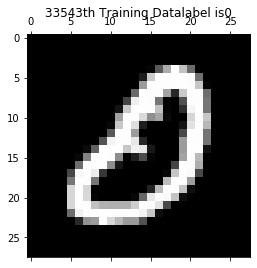

In [22]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

#  自己下载 MNIST_data 数据集，  mnist_data_folder数据集存放地址，采用0-1编码
mnist_data_folder="d:/MNIST_data"  
mnist=input_data.read_data_sets(mnist_data_folder,one_hot=True) 

print(mnist.train.num_examples)
print(mnist.test.num_examples)
 
trainimg = mnist.train.images
trainlabel = mnist.train.labels
testimg = mnist.test.images
testlabel = mnist.test.labels
 
#打印相关信息
print(type(trainimg))
print(trainimg.shape,)
print(trainlabel.shape,)
print(testimg.shape,)
print(testlabel.shape,)
 
nsample = 5
randidx = np.random.randint(trainimg.shape[0],size = nsample)
 
#输出几张数字的图
for i in randidx:
  curr_img = np.reshape(trainimg[i,:],(28,28))
  curr_label = np.argmax(trainlabel[i,:])
  plt.matshow(curr_img,cmap=plt.get_cmap('gray'))
  plt.title(""+str(i)+"th Training Data"+"label is"+str(curr_label))
  print(""+str(i)+"th Training Data"+"label is"+str(curr_label))
  plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

#  自己下载 MNIST_data 数据集，  mnist_data_folder数据集存放地址，采用0-1编码
mnist_data_folder="d:/MNIST_data"  
mnist=input_data.read_data_sets(mnist_data_folder,one_hot=True) 

 
#每个批次100张照片
batch_size = 100
 
#计算一共有多少个批次
n_batch = mnist.train.num_examples // batch_size
 
#定义两个placeholder
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])
 
#创建一个简单的神经网络，输入层784个神经元，输出层10个神经元
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
prediction = tf.nn.softmax(tf.matmul(x,W)+b)
 
#二次代价函数
# loss = tf.reduce_mean(tf.square(y-prediction))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=prediction))
 
#使用梯度下降法
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
 
#初始化变量
init = tf.global_variables_initializer()
 
#结果存放在一个布尔型列表中
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))
#求准确率
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
 
 
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(11):
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys})
            acc = sess.run(accuracy,feed_dict = {x:mnist.test.images,y:mnist.test.labels})
            print("Iter " + str(epoch) + ",Testing Accuracy " + str(acc))
 

In [31]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

#  自己下载 MNIST_data 数据集，  mnist_data_folder数据集存放地址，采用0-1编码
mnist_data_folder="d:/MNIST_data"  
mnist=input_data.read_data_sets(mnist_data_folder,one_hot=True) 


x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b

# Define loss and optimizer 

y_ = tf.placeholder(tf.float32, [None, 10]) 

# The raw formulation of cross-entropy, 

# # tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.nn.softmax(y)), 

# reduction_indices=[1])) # 
# can be numerically unstable. # 
# So here we use tf.nn.softmax_cross_entropy_with_logits on the raw 
# outputs of 'y', and then average across the batch.

cross_entropy = tf.reduce_mean( 
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
    
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy) 
sess = tf.InteractiveSession()

tf.global_variables_initializer().run()

# Train 
for _ in range(1000): 
  batch_xs, batch_ys = mnist.train.next_batch(100) 
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys}) 
# Test trained model

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1)) 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

Extracting d:/MNIST_data\train-images-idx3-ubyte.gz
Extracting d:/MNIST_data\train-labels-idx1-ubyte.gz
Extracting d:/MNIST_data\t10k-images-idx3-ubyte.gz
Extracting d:/MNIST_data\t10k-labels-idx1-ubyte.gz


d:\anaconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\client\session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


0.913
